# **Phishing Website Detection Using Machine Learning**

Phishing attacks remain one of the most prevalent cybersecurity threats, exploiting human psychology and technical vulnerabilities to steal sensitive information such as login credentials, financial details, and personal data. These attacks often involve fraudulent websites designed to mimic legitimate ones, tricking users into providing confidential information.

This project aims to develop a **binary classification model** using **Python and Scikit-Learn** to detect phishing websites effectively. The model is trained on a dataset containing various features that differentiate legitimate websites from malicious ones. Multiple classification algorithms, including **Logistic Regression, Decision Tree, and Random Forest**, are implemented and compared to determine the most accurate and efficient approach.

## **Objectives**
- ✔ Train a machine learning model to classify websites as either **phishing** or **legitimate**.
- ✔ Utilize various classification techniques to evaluate performance and accuracy.
- ✔ Identify key features that distinguish phishing websites from genuine ones.
- ✔ Improve detection rates to enhance cybersecurity defenses against online fraud.

## **Methodology**
1. **Data Preprocessing:** Cleaning and structuring the dataset for model training.
2. **Feature Engineering:** Extracting key website attributes such as URL structure, domain age, SSL certificate details, and page behavior.
3. **Model Training:** Implementing and training classification models using **Logistic Regression, Decision Tree, and Random Forest**.
4. **Evaluation & Optimization:** Measuring accuracy, precision, recall, and F1-score to select the best-performing model.
5. **Deployment (Optional):** Integrating the trained model into a security application for real-time phishing detection.

## **Expected Outcomes**
- 🔹 A reliable machine learning model that accurately classifies phishing websites.
- 🔹 Insights into the most significant indicators of phishing attacks.
- 🔹 Potential integration into browser extensions or cybersecurity tools to alert users in real-time.

By leveraging machine learning, this project contributes to strengthening online security, reducing cyber fraud, and protecting users from phishing scams. 🚀🔐


In [6]:
#Import the require library
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [7]:
#load the datasets
df_data=pd.read_csv("phishing.txt")
df_data.head()

,-1,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [8]:
#Data Description
df_data.columns

Index(['-1', '1', '1.1', '1.2', '-1.1', '-1.2', '-1.3', '-1.4', '-1.5', '1.3',
       '1.4', '-1.6', '1.5', '-1.7', '1.6', '-1.8', '-1.9', '-1.10', '0',
       '1.7', '1.8', '1.9', '1.10', '-1.11', '-1.12', '-1.13', '-1.14', '1.11',
       '1.12', '-1.15', '-1.16'],
      dtype='object')

In [9]:
df_data.columns=['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class']

In [10]:
df_data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [11]:
df_data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [12]:
df_data.tail(10)

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
11044,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11045,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,1,1,1
11046,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11047,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [13]:
df_data.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,0.628551,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,0.777804,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_data.shape

(11054, 31)

In [15]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [16]:
#checking if thier is any missing data
df_data.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

We can see that their are no missing data

In [17]:
used_data=['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport']

X=df_data[used_data]
y=df_data["class"]



In [18]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#implementing logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9267410310521556


In [19]:
#checking for overfitting 
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9282667700659171
0.9267410310521556


In [20]:
#making the data column more understandable 
df_lists = []
for i in df_data.columns:
    x = df_data["%s" % i].tolist()
    if 0 not in x:
        for n,i in enumerate(x):
            if i==-1:
                x[n]='phishing'
            elif i==1:
                x[n]='legitimate'
    elif 0 in x:
        for n,i in enumerate(x):
            if i==-1:
                x[n]='legitimate'
            elif i==1:
                x[n]='suspicious'
            else:
                x[n]='phishing'
    df_lists.append(x)
    
headers = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport',"class"]
df2 = pd.DataFrame(df_lists)
df2 = df2.transpose()
df2.columns = headers
df2.to_csv(path_or_buf='Training_Dataset2.txt',header=False, index=False)
df2.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,legitimate,suspicious,legitimate,legitimate,legitimate,phishing,phishing,suspicious,phishing,legitimate,...,legitimate,legitimate,phishing,phishing,phishing,phishing,legitimate,suspicious,legitimate,phishing
1,legitimate,phishing,legitimate,legitimate,legitimate,phishing,legitimate,legitimate,phishing,legitimate,...,legitimate,legitimate,legitimate,phishing,suspicious,phishing,legitimate,phishing,phishing,phishing
2,legitimate,phishing,legitimate,legitimate,legitimate,phishing,legitimate,legitimate,legitimate,legitimate,...,legitimate,legitimate,phishing,phishing,suspicious,phishing,legitimate,legitimate,legitimate,phishing
3,legitimate,phishing,phishing,legitimate,legitimate,phishing,suspicious,suspicious,phishing,legitimate,...,phishing,legitimate,phishing,phishing,phishing,phishing,legitimate,suspicious,legitimate,legitimate
4,phishing,phishing,phishing,legitimate,phishing,phishing,suspicious,suspicious,phishing,legitimate,...,legitimate,legitimate,legitimate,legitimate,suspicious,phishing,legitimate,legitimate,phishing,legitimate


In [21]:
X_new=df_data.iloc[0:13,[6,14]].values
y_new=df_data.iloc[0:13,30].values

In [22]:
print(X)

       UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0            1        1         1        1              1             -1   
1            1        0         1        1              1             -1   
2            1        0         1        1              1             -1   
3            1        0        -1        1              1             -1   
4           -1        0        -1        1             -1             -1   
...        ...      ...       ...      ...            ...            ...   
11049        1       -1         1       -1              1              1   
11050       -1        1         1       -1             -1             -1   
11051        1       -1         1        1              1             -1   
11052       -1       -1         1        1              1             -1   
11053       -1       -1         1        1              1             -1   

       SubDomains  HTTPS  DomainRegLen  Favicon  ...  DisableRightClick  \
0           

In [23]:
print(y)

0       -1
1       -1
2       -1
3        1
4        1
        ..
11049    1
11050   -1
11051   -1
11052   -1
11053   -1
Name: class, Length: 11054, dtype: int64


In [24]:
df_data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [25]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
rodel=LogisticRegression(C=100)
rodel.fit(X_new,y_new)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)
rodel.fit(X_train,Y_train)

LogisticRegression(C=100)

In [26]:
Y_pred=rodel.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.25


In [27]:
#Implementing Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
y_model=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9267410310521556


In [29]:
#Checking for overfitting
print(model.score(x_train,y_train))

0.90758691999483


In [30]:
print(model.score(x_test,y_test))

0.9086523967440459


[Text(283.2923076923077, 380.52, 'X[7] <= 0.5\ngini = 0.494\nsamples = 7737\nvalue = [3442, 4295]'),
 Text(103.01538461538462, 271.8, 'X[13] <= -0.5\ngini = 0.197\nsamples = 3314\nvalue = [2947, 367]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 2121\nvalue = [2121, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'X[14] <= -0.5\ngini = 0.426\nsamples = 1193\nvalue = [826, 367]'),
 Text(103.01538461538462, 54.360000000000014, 'gini = 0.221\nsamples = 609\nvalue = [532, 77]'),
 Text(206.03076923076924, 54.360000000000014, 'gini = 0.5\nsamples = 584\nvalue = [294, 290]'),
 Text(463.5692307692308, 271.8, 'X[13] <= -0.5\ngini = 0.199\nsamples = 4423\nvalue = [495, 3928]'),
 Text(360.55384615384617, 163.07999999999998, 'X[5] <= 0.0\ngini = 0.238\nsamples = 188\nvalue = [162, 26]'),
 Text(309.04615384615386, 54.360000000000014, 'gini = 0.155\nsamples = 177\nvalue = [162, 15]'),
 Text(412.0615384615385, 54.360000000000014, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]

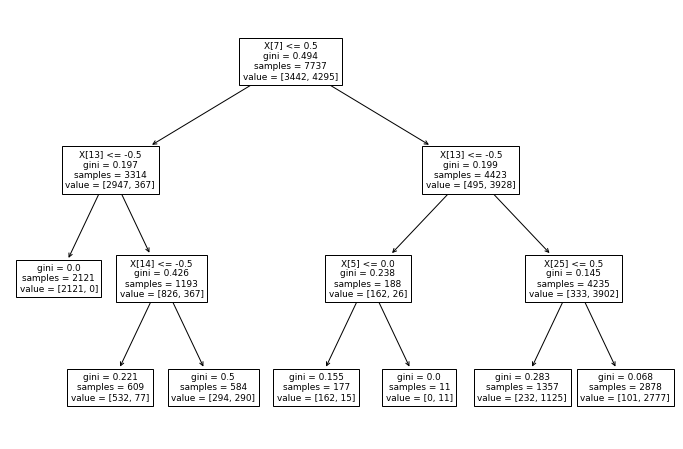

In [31]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(model.fit(x_train,y_train))


In [32]:
#Implemting Second criterion to know the best fit model
from sklearn.tree import DecisionTreeClassifier
foldel=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
foldel.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [33]:
y_model=foldel.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9267410310521556


In [34]:
print(foldel.score(x_train,y_train))

0.90758691999483


In [35]:
print(foldel.score(x_test,y_test))

0.9086523967440459


[Text(283.2923076923077, 380.52, 'X[7] <= 0.5\nentropy = 0.991\nsamples = 7737\nvalue = [3442, 4295]'),
 Text(103.01538461538462, 271.8, 'X[13] <= -0.5\nentropy = 0.502\nsamples = 3314\nvalue = [2947, 367]'),
 Text(51.50769230769231, 163.07999999999998, 'entropy = 0.0\nsamples = 2121\nvalue = [2121, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'X[14] <= -0.5\nentropy = 0.89\nsamples = 1193\nvalue = [826, 367]'),
 Text(103.01538461538462, 54.360000000000014, 'entropy = 0.548\nsamples = 609\nvalue = [532, 77]'),
 Text(206.03076923076924, 54.360000000000014, 'entropy = 1.0\nsamples = 584\nvalue = [294, 290]'),
 Text(463.5692307692308, 271.8, 'X[13] <= -0.5\nentropy = 0.506\nsamples = 4423\nvalue = [495, 3928]'),
 Text(360.55384615384617, 163.07999999999998, 'X[5] <= 0.0\nentropy = 0.58\nsamples = 188\nvalue = [162, 26]'),
 Text(309.04615384615386, 54.360000000000014, 'entropy = 0.419\nsamples = 177\nvalue = [162, 15]'),
 Text(412.0615384615385, 54.360000000000014, 'entropy = 0.0\ns

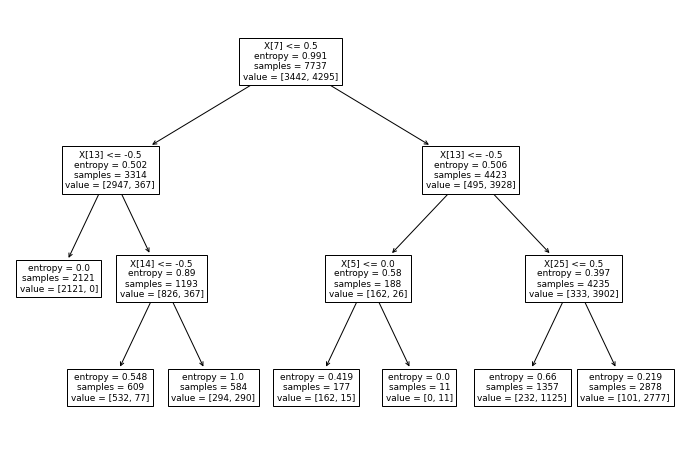

In [36]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(foldel.fit(x_train,y_train))

In [37]:
#Implemntig RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [38]:
print(accuracy_score(y_test,y_pred))

0.967741935483871


In [39]:
from sklearn.ensemble import RandomForestClassifier
fodel=RandomForestClassifier(n_estimators=100,random_state=0)
fodel.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [40]:
print(accuracy_score(y_test,y_pred))

0.967741935483871


In [41]:
#Checking features Importances
features_score=pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)

In [42]:
features_score

HTTPS                  0.291378
AnchorURL              0.257645
WebsiteTraffic         0.081888
SubDomains             0.069762
PrefixSuffix-          0.043979
LinksInScriptTags      0.043516
ServerFormHandler      0.019641
RequestURL             0.019510
LinksPointingToPage    0.019485
AgeofDomain            0.017083
DomainRegLen           0.016835
UsingIP                0.013794
GoogleIndex            0.013455
DNSRecording           0.013130
PageRank               0.012576
LongURL                0.008181
HTTPSDomainURL         0.005623
WebsiteForwarding      0.005573
StatsReport            0.005290
ShortURL               0.005289
InfoEmail              0.005199
Symbol@                0.005075
UsingPopupWindow       0.004814
AbnormalURL            0.004455
Favicon                0.003925
Redirecting//          0.003483
StatusBarCust          0.003317
NonStdPort             0.002332
IframeRedirection      0.002331
DisableRightClick      0.001437
dtype: float64

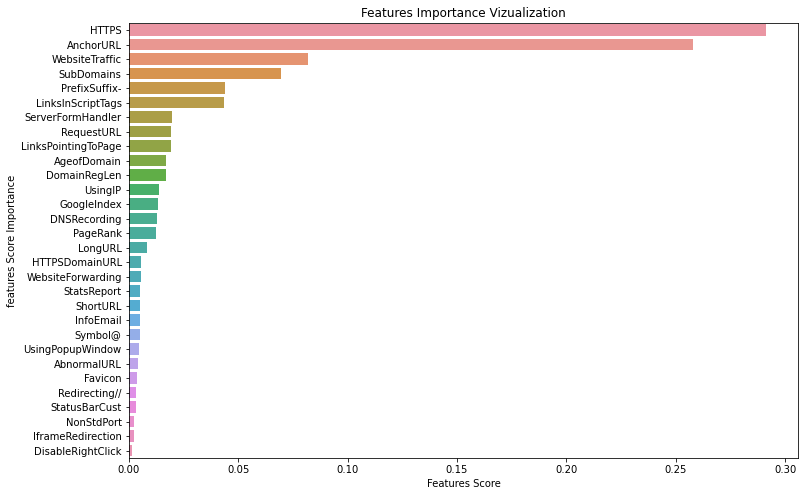

In [43]:
#Vizualising the Features importances
plt.figure(figsize=(12,8))
sns.barplot(x=features_score,y=features_score.index)
plt.xlabel("Features Score")
plt.ylabel("features Score Importance")
plt.title("Features Importance Vizualization")
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.968947844437745


In [45]:
print(confusion_matrix(y_test,y_pred))

[[1390   65]
 [  38 1824]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1455
           1       0.97      0.98      0.97      1862

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317

